In [3]:
from enki_env import (ParallelEnkiEnv, EnkiEnv, GroupConfig, 
                      ThymioAction, ThymioObservation, 
                      EPuckAction, EPuckObservation, setup_policies)
import gymnasium as gym
import pyenki

In [4]:
import math

def my_scenario(seed=0):
    world = pyenki.World(radius=50.0, seed=seed)
    robot = pyenki.Thymio2()
    robot.position = (world.random_generator.uniform(-5, 5), -5)
    robot.angle = world.random_generator.uniform(0, math.pi * 2)
    world.add_object(robot)
    robot = pyenki.EPuck()
    robot.position = (world.random_generator.uniform(-5, 5), 10)
    robot.angle = world.random_generator.uniform(0, math.pi * 2)
    world.add_object(robot)
    return world

config = {'thymio': GroupConfig(action=ThymioAction(), observation=ThymioObservation()), 
          'e-puck': GroupConfig(action=EPuckAction(), observation=EPuckObservation(camera=False))}

In [5]:
env = ParallelEnkiEnv(my_scenario, config=config, render_mode=None, 
                      render_kwargs=dict(camera_is_ortho=True, camera_altitude=20, camera_yaw=1, camera_pitch=-0.5, camera_position=(-30, -30)))

In [6]:
env.reset(seed=313)

({'thymio_0': {'prox/value': array([1., 1., 1., 1., 1., 1., 1.])},
  'e-puck_0': {'prox/value': array([1.        , 1.        , 1.        , 1.        , 0.52796019,
          1.        , 1.        , 1.        ])}},
 {'thymio_0': {}, 'e-puck_0': {}})

In [7]:
img = env.render()

Use python viewer


UNSUPPORTED (log once): POSSIBLE ISSUE: unit 0 GLD_TEXTURE_INDEX_2D is unloadable and bound to sampler type (Float) - using zero texture because texture unloadable


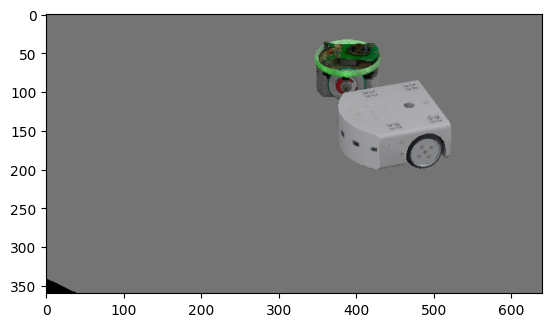

In [8]:
from matplotlib import pyplot as plt

plt.imshow(img)

In [9]:
from pettingzoo.test import parallel_api_test

parallel_api_test(env)

Passed Parallel API test


In [10]:
import numpy as np
class MyPolicy:

    def predict(self,
                observation,
                state=None,
                episode_start=None,
                deterministic=False):
        if observation['prox/value'][0] < 1:
            return np.array([0, 0]), None
        else:
            return np.array([0.5, -0.5]), None

policy = MyPolicy()

In [11]:
def rollout(env, steps, seed=0):
    obs, _ = env.reset(seed=seed)
    for i in range(steps):
        acts = {a: policy.predict(o)[0] for a, o in obs.items()}
        obs, *_ = env.step(acts)       

In [12]:
rollout(env, 100)

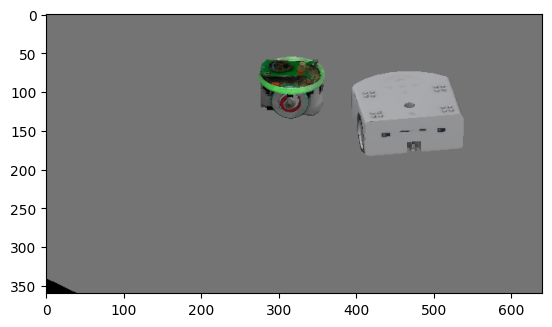

In [13]:
plt.imshow(env.render())

In [14]:
env = ParallelEnkiEnv(my_scenario, config=config, render_mode="human", 
                      render_kwargs=dict(camera_is_ortho=False, camera_altitude=20), render_fps=30)

Create render buffer


RFBOutputContext()

In [15]:
env.reset(seed=0);

EnkiRemoteFrameBuffer()
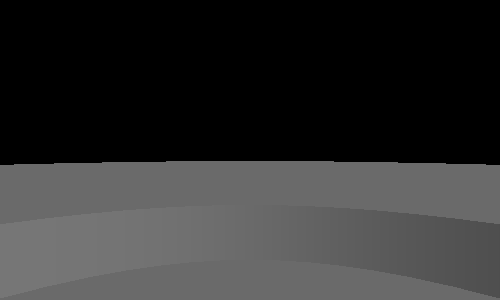

In [16]:
env._render_buffer

In [18]:
rollout(env, steps=30, seed=0)

In [18]:
from pyenki.video import make_video

In [33]:
world = my_scenario(seed=2)
setup_policies(world, config, {'thymio': policy, 'e-puck': policy})
video = make_video(world, duration=3, time_step=0.1, camera_is_ortho=False, camera_altitude=30, camera_pitch=-1.5)
video.display_in_notebook(fps=10, rd_kwargs=dict(logger=None), width=640)